**Project Name**: Banking Analytics - Predicting Deposit Subscriber

**Author**: Ankur Dhamija

**Connect on Linkedin**: https://www.linkedin.com/in/ankurdhamija/

--------

# Banking Analytics - Predicting Deposit Subscriber

-------

# 1. About the dataset

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 
means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



------

## 2. Goal

*The `classification goal` is to `predict` if the `client will subscribe a term deposit` (variable y).*

-----

## Key Findings

- XXX

---------

## 3. Approach
- Load the required libraries
- Load the dataset
- Overview of the dataset
- Data Manipulation
- Exploratory Data Analysis
- Data Pre-Processing
- Model Selection
- Recursive Feature Elimination
- Select Features
- Model Tuning - Hyperparameter optimization
- Final Model
- Evaluate Final Model

## 4. Load the required libraries

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import required modules
from pandas_profiling import ProfileReport
import missingno as msno

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline

#Sk-Learn Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Sk-Learn Model Selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from scipy import stats

In [3]:
#Set Seaborn Theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")

In [4]:
#Setting to display Pipeline
from sklearn import set_config
set_config(display="diagram")

-------

## 5. Load the dataset

In [5]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [6]:
#Visualize the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


--------

## 6. Overview of the dataset

In [7]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

### Check for missing values

<AxesSubplot:>

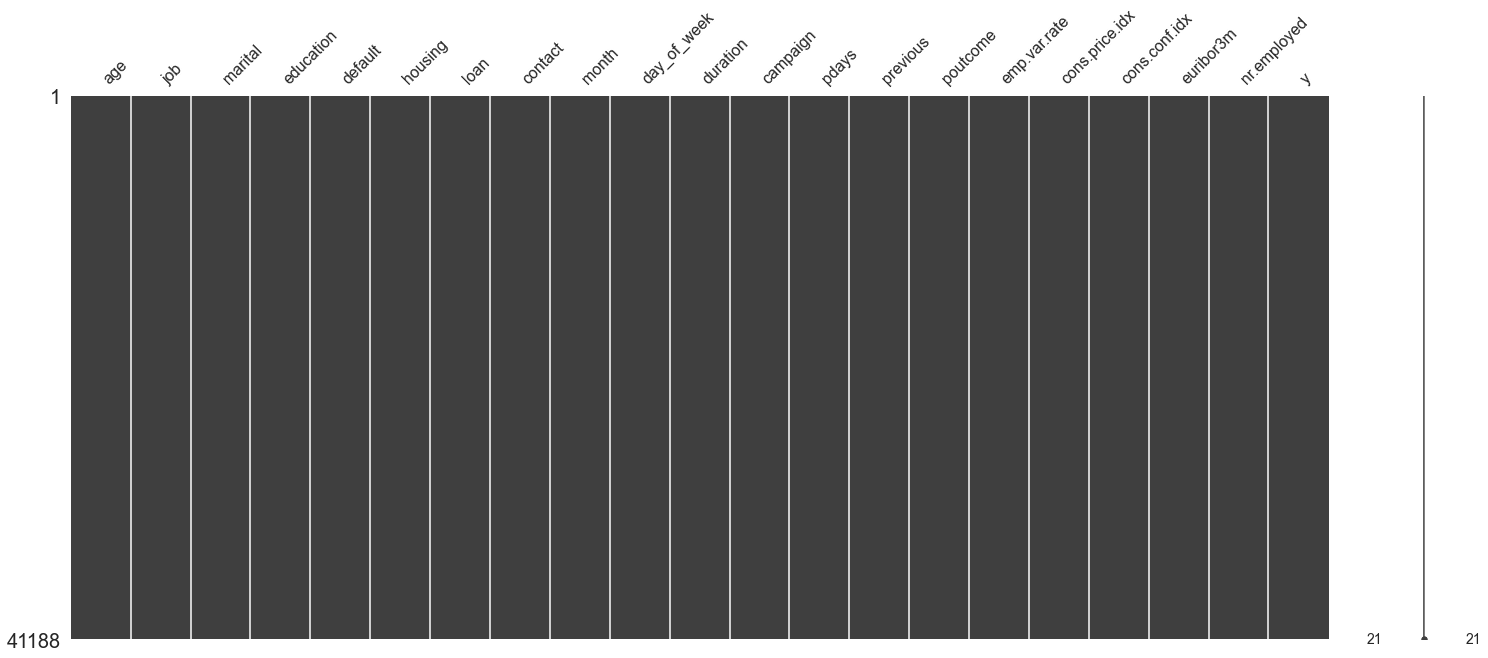

In [8]:
# Visualize missing values as a matrix
msno.matrix(df)

-----

## 7. Data manipulation

### 7.1 Rename columns

In [9]:
#

### 7.2 Move target variable to the beginning of the dataset

In [10]:
# # Moving the reponse variable "turnover" to the front of the table
# front = df['turnover']
# df.drop(labels=['turnover'], axis=1,inplace = True)
# df.insert(0, 'turnover', front)
# df.head()

### 7.3 Check and remove duplicates

In [11]:
# Check for numbe of duplicates in the dataset
print(df.duplicated().sum())

12


In [12]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Check for numbe of duplicates in the dataset
print(df.duplicated().sum())

0


-----

## 8. Dataset Overview - Exploratory Data Analysis

<blockquote><b>Only 11% of the customers</b> contacted successfully subscribed to a term deposit.</blockquote>

In [14]:
#Customers who successfully subscribed to a term deposit
"{:.2f}".format(df["y"].value_counts()["yes"]/(df["y"].value_counts()["yes"]+df["y"].value_counts()["no"]))

'0.11'

no     36537
yes     4639
Name: y, dtype: int64

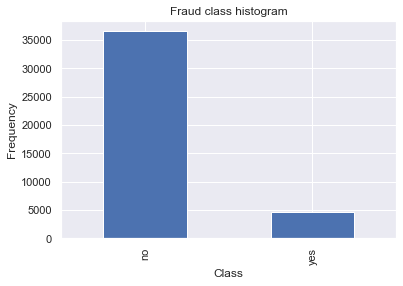

In [15]:
#Check the frequency of the output variable
pd.value_counts(df['y']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['y'].value_counts()

---------

## 9. Data Pre-Processing Pipeline

### 9.1 Create train-test split

In [16]:
#Split the train and test data
train, test =  train_test_split(df,test_size=0.2, random_state=123, stratify=df['y'])
print(train.shape)
print(test.shape)

(32940, 21)
(8236, 21)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

### 9.2 Custom Pre-Processing Transformers

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
#Get the list of Numerical columns for scaling
numCols = ['age',
           'duration',
           'campaign',
           'pdays',
           'previous',
           'emp.var.rate',
           'cons.price.idx',
           'cons.conf.idx',
           'euribor3m',
           'nr.employed']

In [22]:
#Get the list of categorical columns for dummy encoding
dummyColList = ['job',
                'marital',
                'education',
                'default',
                'housing',
                'loan',
                'contact',
                'month',
                'day_of_week',
                'poutcome']

In [23]:
#Custom Transformer that transforms Categorical columns
class DummyEncoding( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, dummyColList):
        self.dummyColList = dummyColList
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        #One-Hot Encoding of categorical columns
        #Get dummy variables
        for each_col in self.dummyColList:
            X[each_col] = pd.factorize(X[each_col])[0]
        
        return X

In [24]:
#Custom Transformer that scales Numerical columns
class CustomScaler( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, numCols):
        self.numCols = numCols
        self.scaler = MinMaxScaler()
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        self.scaler.fit(X[numCols])
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        X[numCols] = self.scaler.transform(X[numCols])
        
        return X

### 9.3 Pre-Processing pipeline

In [25]:
train["y"] = pd.factorize(train["y"])[0]
test["y"] = pd.factorize(test["y"])[0]

In [26]:
#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [('dummyEncodingTransformer', DummyEncoding(dummyColList))] )

In [27]:
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'min_max_scaler', CustomScaler(numCols)) ] )

In [28]:
#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
preProcessingPipeline = Pipeline( steps = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                                  ( 'numerical_pipeline', numerical_pipeline ) ] )



In [29]:
preProcessingPipeline

Pipeline(steps=[('categorical_pipeline',
                 Pipeline(steps=[('dummyEncodingTransformer',
                                  DummyEncoding(dummyColList=['job', 'marital',
                                                              'education',
                                                              'default',
                                                              'housing', 'loan',
                                                              'contact',
                                                              'month',
                                                              'day_of_week',
                                                              'poutcome']))])),
                ('numerical_pipeline',
                 Pipeline(steps=[('min_max_scaler',
                                  CustomScaler(numCols=['age', 'duration',
                                                        'campaign', 'pdays',
                                                        'previous',
                                                        'emp.var.rate',
                                                        'cons.price.idx',
                                                        'cons.conf.idx',
                                                        'euribor3m',
                                                        'nr.employed']))]))])

In [30]:
#Fit_transform the pipeline on training data
train_transform = preProcessingPipeline.fit_transform(train)

In [31]:
#Transform the pipeline on test data
test_transform = preProcessingPipeline.transform(test)

In [32]:
train_transform.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3369,0.160494,0,0,0,0,0,0,0,0,0,0.081131,0.000000,1.0,0.000000,0,0.937500,0.698753,0.602510,0.958059,0.859735,0
11480,0.209877,1,1,1,0,0,0,0,1,1,0.009150,0.054545,1.0,0.000000,0,1.000000,0.882307,0.376569,0.980503,1.000000,0
23021,0.481481,1,1,2,0,0,0,1,2,2,0.097397,0.054545,1.0,0.000000,0,1.000000,0.484412,0.615063,0.981864,1.000000,0
28565,0.296296,2,2,0,0,0,1,1,3,3,0.061204,0.000000,1.0,0.166667,1,0.333333,0.340608,0.154812,0.177057,0.512287,0
2635,0.172840,2,2,1,0,1,0,0,0,2,0.192151,0.018182,1.0,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735,1


### 9.4 Extract X and y

In [33]:
# Putting response variable to y
y_train = train_transform.pop('y')
X_train = train_transform

In [34]:
# Putting response variable to y
y_test = test_transform.pop('y')
X_test = test_transform

### 9.5 Class Imbalance treatment - SMOTE

In [35]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# 10. Model Inputs

### 10.1 Hyper Parameters for the model

In [36]:
#Hyper Parameters for different models 
paramsLogReg = {
                'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : [100, 10, 1.0, 0.1, 0.01],
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
                }

paramsRidge = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
paramsSGD = {}
paramsNB = {'var_smoothing': np.logspace(0,-9, num=100)}
paramsKNN = {
            'n_neighbors' : range(1,21,2),
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
            }

paramsDT = {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
            }

paramsRF = {'n_estimators': [25, 50, 100, 150, 200], 
            'max_depth': [3, 5, 7, 9], 
            'max_features': ["auto", "sqrt", "log2"], 
            'random_state': [42]
           }

paramsBC = {
            "n_estimators": [10, 100, 1000]
            }

paramsGBC = {
            "n_estimators": [10, 100, 1000],
            "learning_rate": [0.001, 0.01, 0.1],
            "subsample": [0.5, 0.7, 1.0],
            "max_depth": [3, 7, 9]
            }



### 10.2 Models List

In [37]:
#List of models to evaluate
models = [{"modelName": "LogisticRegression", 
           "model": LogisticRegression(), 
           "modelAvgCVScore": 10, 
           "modelParams": paramsLogReg, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "Ridge", 
           "model": RidgeClassifier(), 
           "modelAvgCVScore": 11, 
           "modelParams": paramsRidge, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []},
          
          {"modelName": "SGD", 
           "model": SGDClassifier(), 
           "modelAvgCVScore": 9, 
           "modelParams": paramsSGD, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "NaiveBayes", 
           "model": CategoricalNB(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsNB, 
           "cvResults": [], 
           "rfeStatus": False, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "KNN", 
           "model": KNeighborsClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsKNN, 
           "cvResults": [], 
           "rfeStatus": False, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "DecisionTree", 
           "model": DecisionTreeClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsDT, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
        
          {"modelName": "RandomForest", 
           "model": RandomForestClassifier(n_estimators = 100), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsRF, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "BaggingClassifier", 
           "model": BaggingClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "BoostingClassifier", 
           "model": GradientBoostingClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsGBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          }
          
         ]

### 10.3 RFE/RFECV Inputs

In [38]:
#Minimun number of features for RFE
min_features = 2

#Maximum number of features for RFE
max_features = X_train.shape[1]

#Step size in RFECV
rfecvStep = 3

#Perform manual RFE
rfeStatus = False

#Perform Auto RFE
rfeCVStatus = True

### 10.4 Cross-Validation Inputs

In [39]:
#Scoring parameter
scoring = "roc_auc"

#Number of splits in K-Fold Cross Validation
n_splits = 5

#Random state
random_state = 23

#Shuffle in K-Fold cross validation
shuffle = True

# 11. Models Class

### 11.1 Models Class
The Models Class provides the following functionalities
- Initialize various Classification models along with respective hyper-parameters
- Run and compare model performance
- Select the best performing model
- Perform RFE on the best performing model
- Select the best features
- Run the final model

In [40]:
class Models:
    
    #Init Function
    def __init__(self, models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus):
        
        self.models = models
        self.min_features = min_features
        self.max_features = max_features
        self.scoring = scoring
        self.n_splits = n_splits
        self.random_state = random_state
        self.shuffle = shuffle
        self.rfecvStep = rfecvStep
        self.rfeStatus = rfeStatus
        self.rfeCVStatus = rfeCVStatus
    
    #K-Fold Cross validation
    def crossValidation(self, model, X, y):
        #Instantiate KFold
        kfold = KFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=self.shuffle)
        return cross_val_score(model, X, y, cv=kfold, scoring=self.scoring)
    
    #Function to runModels
    def runModels(self, X, y):
        
        print("Starting to execute and compare various models...")
        #Loop over each model and do K-Fold Cross validation to select the best model
        for each_model in self.models:
            print("Running {}".format(each_model["modelName"]))
            
            #List of CV results of each model
            each_model["cvResults"] = self.crossValidation(each_model["model"], X, y)
            
            #Average CV score
            each_model["modelAvgCVScore"] = each_model["cvResults"].mean()
            
            if math.isnan(each_model["modelAvgCVScore"]):
                each_model["modelAvgCVScore"] = 0

        print("All models successfully executed")
    
    #Function to compare Model results        
    def compareModels(self, results, names):
        
        #Print results of various models
        for each_result, modelName in zip(results, names):
            print("Model Name: %s:" % (modelName))
            print("Model Average CV Score: %f" % (each_result.mean()))
            print("Model CV Std (%f)" % (each_result.std())) 
            print("CV_Results: ", (each_result))
            print("\n")
        
        # Box Plot of Model Results
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.xticks(rotation=45)
        plt.show()
        
    #Get shortlisted Model
    def getShortlistedModel(self):
        
        #Get shortlisted model based on highest average CV Score
        self.shortlistedModel = max(self.models, key=lambda x:x['modelAvgCVScore'])
        
        print("Shortlisted model is : ", self.shortlistedModel)
            
            
    #Function to run RFE models and return the CV results
    def runRFEModels(self, X, y):
        
        results = []
        
        print("These are the models: ", self.shortlistedModel["rfeModels"])
        
        if ((self.rfeStatus == True) and (self.shortlistedModel["rfeStatus"] == True)):
        
            #Loop over the rfe models for the shortlisted model
            for each_model in self.shortlistedModel["rfeModels"]:
            
                #CV results of each model
                cvResults = self.crossValidation(each_model, X, y)
                print("Average score is : ", cvResults.mean())
            
                results.append(cvResults)
            
        return results
            
            
    #Get the list of RFE Models
    def getRfeModels(self):

        #Perform RFE on the model
        for i in range(self.min_features, self.max_features):
            rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=i)
            self.shortlistedModel["rfeModels"].append(Pipeline(steps=[('selection',rfe),('model',self.shortlistedModel["model"])]))
            self.shortlistedModel["rfeInputFeaturesCount"].append(i)

                    
    #Set optimial number of features based on RFE Model
    def getOptimalNumFeatures(self):
#         self.shortlistedModel[]

        #It is an array of arrays with each nested array containing CV results
        results = modelObj.shortlistedModel["RFECVResults"]
        meanResults = [x.mean() for x in results]
        maxpos = meanResults.index(max(meanResults)) 

        self.optimalFeatures =  list(range(self.min_features, self.max_features))[maxpos]

    
    #Run shortlisted RFE Model with optimal number of features to actually get feature names
    def getBestFeatures(self, X, y):
        
        
        rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=self.optimalFeatures)
        self.pipe = Pipeline(steps=[('selection',rfe), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfe.support_[col_num], rfe.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print(list(zip(X.columns,rfe.support_,rfe.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfe.support_])

        return X.columns[rfe.support_]
        
    
    #Run RFECV Model to find the names of optimal features
    def getBestFeaturesCV(self, X, y):

        rfecv = RFECV(estimator=self.shortlistedModel["model"], step=self.rfecvStep, cv=self.n_splits)

        self.pipe = Pipeline(steps=[('selection',rfecv), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfecv.support_[col_num], rfecv.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print("this is rfecv support: ", rfecv.support_)
        print(list(zip(X.columns,rfecv.support_,rfecv.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfecv.support_])

        return X.columns[rfecv.support_]
    
        
    def getParams(self, modelName):
        
        for each_param in self.params:
            
            if each_param["modelName"] == modelName:
                return each_param["modelParams"]
            
            else:
                return 0
               
    def hyperParameterOptimization(self):
        # Instantiate the grid search model
        grid_search = RandomizedSearchCV(estimator=self.shortlistedModel["model"], 
                           param_distributions=self.shortlistedModel["modelParams"], 
                           cv=self.n_splits, n_jobs=-1, verbose=1, scoring = self.scoring)
        
        grid_search.fit(X_train, y_train)
        
        return grid_search.best_estimator_
    
    def runFinalModel(self):
        pass
    
    def evaluateModel(self):
        pass

### 11.2 Instantiate Models class

In [41]:
#Instantiate Models class
modelObj = Models(models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus)

### 11.3 Run multiple models

In [42]:
#Run the models and print score
modelObj.runModels(X_train, y_train)

Starting to execute and compare various models...
Running LogisticRegression
Running Ridge
Running SGD
Running NaiveBayes
Running KNN
Running DecisionTree
Running RandomForest
Running BaggingClassifier
Running BoostingClassifier
All models successfully executed


### 11.4 Compare model performance

In [43]:
#Store CV results and names of various models
results = [x["cvResults"] for x in modelObj.models]
names = [x["modelName"] for x in modelObj.models]

Model Name: LogisticRegression:
Model Average CV Score: 0.944706
Model CV Std (0.002507)
CV_Results:  [0.94164584 0.94311916 0.94742618 0.94340028 0.94793699]


Model Name: Ridge:
Model Average CV Score: 0.941635
Model CV Std (0.002828)
CV_Results:  [0.93813247 0.94026869 0.94458273 0.93982795 0.94536143]


Model Name: SGD:
Model Average CV Score: 0.942194
Model CV Std (0.003809)
CV_Results:  [0.93633528 0.9409627  0.94571404 0.94098305 0.94697476]


Model Name: NaiveBayes:
Model Average CV Score: nan
Model CV Std (nan)
CV_Results:  [       nan 0.78555818        nan 0.78390566 0.79569295]


Model Name: KNN:
Model Average CV Score: 0.944823
Model CV Std (0.003789)
CV_Results:  [0.94217427 0.9413438  0.94954701 0.94169412 0.94935712]


Model Name: DecisionTree:
Model Average CV Score: 0.921862
Model CV Std (0.003383)
CV_Results:  [0.91746195 0.92415455 0.91967365 0.92096092 0.92705839]


Model Name: RandomForest:
Model Average CV Score: 0.991741
Model CV Std (0.000814)
CV_Results:  [0.99

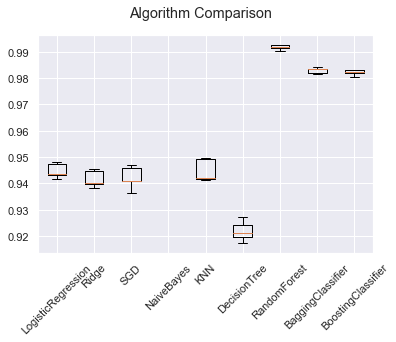

In [44]:
#Plot the results
modelObj.compareModels(results, names)

# 12. Shortlist top performing model

In [45]:
#Set the shortlisted Model
modelObj.getShortlistedModel()

Shortlisted model is :  {'modelName': 'RandomForest', 'model': RandomForestClassifier(), 'modelAvgCVScore': 0.9917412705519644, 'modelParams': {'n_estimators': [25, 50, 100, 150, 200], 'max_depth': [3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [42]}, 'cvResults': array([0.9903856 , 0.99176857, 0.99252846, 0.99141603, 0.99260769]), 'rfeStatus': True, 'rfeModels': [], 'rfeInputFeaturesCount': [], 'RFECVResults': []}


# 13. Recursive Feature Elimination

In [46]:
#Get the List of RFE Models based on number of features and the shortlisted model

if ((modelObj.rfeStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
   
    #Get RFE Models
    modelObj.getRfeModels()
    
    #Run RFE Models and get rfeCVResults
    modelObj.shortlistedModel["RFECVResults"] = modelObj.runRFEModels(X_train, y_train)
    
    #Compare RFE Model results
    modelObj.compareModels(modelObj.shortlistedModel["RFECVResults"], list(range(modelObj.min_features, modelObj.max_features)))
    
    #Select the best performing RFE Model and number of features
    modelObj.getOptimalNumFeatures()
    
    #Get the names of selected columns by RFE
    selectColumns = modelObj.getBestFeatures(X_train, y_train)

In [47]:
#View the shortlisted Model
modelObj.shortlistedModel

{'modelName': 'RandomForest',
 'model': RandomForestClassifier(),
 'modelAvgCVScore': 0.9917412705519644,
 'modelParams': {'n_estimators': [25, 50, 100, 150, 200],
  'max_depth': [3, 5, 7, 9],
  'max_features': ['auto', 'sqrt', 'log2'],
  'random_state': [42]},
 'cvResults': array([0.9903856 , 0.99176857, 0.99252846, 0.99141603, 0.99260769]),
 'rfeStatus': True,
 'rfeModels': [],
 'rfeInputFeaturesCount': [],
 'RFECVResults': []}

# 14. RFECV

In [48]:
#Check if rfeCVStatus == True
if ((modelObj.rfeCVStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    selectColumns = modelObj.getBestFeaturesCV(X_train, y_train)

Summarizing the results of RFE
ColumnName: age | Selected True | Rank: 1.000
ColumnName: job | Selected True | Rank: 1.000
ColumnName: marital | Selected True | Rank: 1.000
ColumnName: education | Selected True | Rank: 1.000
ColumnName: default | Selected True | Rank: 1.000
ColumnName: housing | Selected True | Rank: 1.000
ColumnName: loan | Selected True | Rank: 1.000
ColumnName: contact | Selected True | Rank: 1.000
ColumnName: month | Selected True | Rank: 1.000
ColumnName: day_of_week | Selected True | Rank: 1.000
ColumnName: duration | Selected True | Rank: 1.000
ColumnName: campaign | Selected True | Rank: 1.000
ColumnName: pdays | Selected True | Rank: 1.000
ColumnName: previous | Selected True | Rank: 1.000
ColumnName: poutcome | Selected True | Rank: 1.000
ColumnName: emp.var.rate | Selected True | Rank: 1.000
ColumnName: cons.price.idx | Selected True | Rank: 1.000
ColumnName: cons.conf.idx | Selected True | Rank: 1.000
ColumnName: euribor3m | Selected True | Rank: 1.000
Colu

# 15. Feature Selection

In [49]:
#If we are doing Recursive Feature Elimination
if (((modelObj.rfeStatus == True) or (modelObj.rfeCVStatus == True)) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    X_train_rfe = X_train[selectColumns]
    X_test_rfe = X_test[selectColumns]
    
else:
    X_train_rfe = X_train
    X_test_rfe = X_test

In [50]:
X_train_rfe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.160494,0,0,0,0,0,0,0,0,0,0.081131,0.000000,1.000000,0.000000,0,0.937500,0.698753,0.602510,0.958059,0.859735
1,0.209877,1,1,1,0,0,0,0,1,1,0.009150,0.054545,1.000000,0.000000,0,1.000000,0.882307,0.376569,0.980503,1.000000
2,0.481481,1,1,2,0,0,0,1,2,2,0.097397,0.054545,1.000000,0.000000,0,1.000000,0.484412,0.615063,0.981864,1.000000
3,0.296296,2,2,0,0,0,1,1,3,3,0.061204,0.000000,1.000000,0.166667,1,0.333333,0.340608,0.154812,0.177057,0.512287
4,0.172840,2,2,1,0,1,0,0,0,2,0.192151,0.018182,1.000000,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58453,0.624795,8,1,2,0,0,0,1,3,2,0.039261,0.028303,1.000000,0.000000,0,0.333333,0.340608,0.154812,0.177735,0.512287
58454,0.148148,1,0,0,0,0,0,1,4,1,0.037880,0.018182,0.006895,0.314688,2,0.039622,0.242867,0.818363,0.021865,0.192826
58455,0.128400,6,0,1,0,0,0,1,3,2,0.062542,0.000000,1.000000,0.000000,0,0.216636,0.282486,0.403832,0.123075,0.404281
58456,0.669423,8,2,5,0,0,0,1,4,0,0.069810,0.016152,1.000000,0.000000,0,0.266326,0.633362,0.384716,0.057904,0.090517


# 16. Model Tuning - Hyperparameter optimization

In [51]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [52]:
modelObj.shortlistedModel["model"]

RandomForestClassifier()

In [53]:
finalModel = modelObj.hyperParameterOptimization()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# 17. Final Model

In [54]:
#Visualize the Final Model
finalModel

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [55]:
#Fit the final Model
finalModel.fit(X_train_rfe, y_train)

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [56]:
#Predictions on Final Model
y_test_pred = finalModel.predict(X_test_rfe)

# 18. Evaluate Final Model

In [57]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.888416707139388


array([[6642,  666],
       [ 253,  675]])

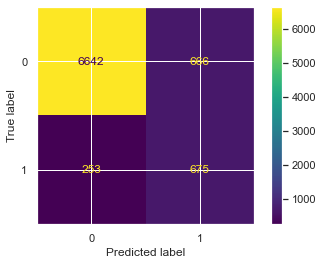

In [58]:
cm = confusion_matrix(y_test, y_test_pred, labels=finalModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=finalModel.classes_)
disp.plot()

plt.show()

## End of notebook

-------